# Regression Exploration Exercises

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings('ignore')

import prepare as pre
from wrangle import wrangle_telco 

In [2]:
df = wrangle_telco()

In [3]:
df.head()

,customer_id,monthly_charges,tenure,total_charges
0,0013-SMEOE,109.70,71,7904.25
1,0014-BMAQU,84.65,63,5377.80
2,0016-QLJIS,90.45,65,5957.90
3,0017-DINOC,45.20,54,2460.55
4,0017-IUDMW,116.80,72,8456.75


In [22]:
df.shape

(1695, 5)

In [15]:
train, validate, test = pre.split_my_data(df)

In [17]:
train.shape, validate.shape, test.shape

((1220, 4), (305, 4), (170, 4))

### Q1. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [6]:
def plot_variable_pairs(df):
    g = sns.PairGrid(df)
# we can specify any two functions we want for visualization
    g.map_diag(sns.distplot) # single variable
    g.map_offdiag(sns.regplot, scatter_kws={"color": "dodgerblue"}, line_kws={"color": "orange"}) # interaction of two variables

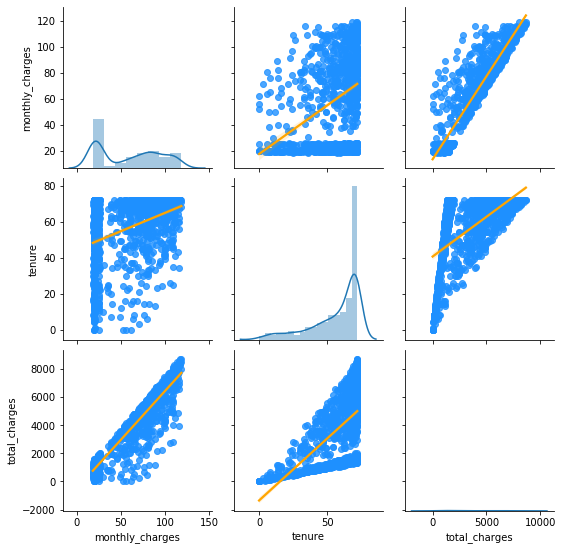

In [18]:
plot_variable_pairs(train)

### Q2. Write a function named months_to_years that accepts your telco churn dataframe and returns a dataframe with a new feature tenure_years, in complete years as a customer.

In [11]:
def months_to_years(df):
    df['yearly_tenure'] = df.tenure.apply(lambda x: math.floor(x/12))
    return df

In [20]:
months_to_years(df)

,customer_id,monthly_charges,tenure,total_charges,yearly_tenure
0,0013-SMEOE,109.70,71,7904.25,5
1,0014-BMAQU,84.65,63,5377.80,5
2,0016-QLJIS,90.45,65,5957.90,5
3,0017-DINOC,45.20,54,2460.55,4
4,0017-IUDMW,116.80,72,8456.75,6
...,...,...,...,...,...
1690,9964-WBQDJ,24.40,71,1725.40,5
1691,9972-EWRJS,19.25,67,1372.90,5
1692,9975-GPKZU,19.75,46,856.50,3
1693,9993-LHIEB,67.85,67,4627.65,5
